# 04 池化层详解

> 下采样、平移不变性、减少参数

---

## 📚 学习目标

- [ ] 理解池化层的作用和优势
- [ ] 从零实现最大池化和平均池化
- [ ] 理解全局平均池化
- [ ] 掌握池化层的参数计算

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False
np.random.seed(42)
print("环境准备完成！")

环境准备完成！


---

## 💡 为什么需要池化？

### 三大作用

1. **降低维度**：减少计算量和参数
2. **平移不变性**：小的位移不影响输出
3. **防止过拟合**：信息压缩

---

## 💻 最大池化 (Max Pooling)

**公式**：
$$O[i, j] = \max_{m,n \in R_{i,j}} I[m, n]$$

其中 $R_{i,j}$ 是位置 $(i,j)$ 对应的池化窗口。

In [3]:
def max_pool2d(image, pool_size=2, stride=None):
    """
    最大池化实现
    
    参数:
        image: 输入, shape (H, W) 或 (C, H, W)
        pool_size: 池化窗口大小
        stride: 步幅，默认等于 pool_size
    
    返回:
        pooled: 池化后的结果
    """
    if stride is None:
        stride = pool_size
    
    # 处理单通道和多通道
    if image.ndim == 2:
        image = image[np.newaxis, :]  # 添加通道维度
        squeeze = True
    else:
        squeeze = False
    
    C, H, W = image.shape
    
    # 计算输出尺寸
    out_h = (H - pool_size) // stride + 1
    out_w = (W - pool_size) // stride + 1
    
    output = np.zeros((C, out_h, out_w))
    
    for c in range(C):
        for i in range(out_h):
            for j in range(out_w):
                i_start = i * stride
                j_start = j * stride
                
                # 提取池化窗口
                window = image[c, i_start:i_start+pool_size, 
                                  j_start:j_start+pool_size]
                
                # 取最大值
                output[c, i, j] = np.max(window)
    
    if squeeze:
        output = output[0]
    
    return output

输入 (4×4):
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]
 [13. 14. 15. 16.]]

最大池化 2×2, stride=2 (输出 2×2):
[[ 6.  8.]
 [14. 16.]]


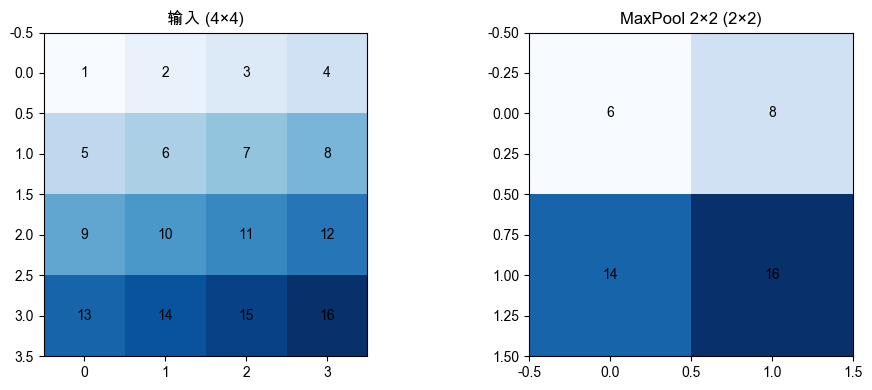

In [4]:
# 测试最大池化
test_img = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
], dtype=float)

pooled = max_pool2d(test_img, pool_size=2, stride=2)

print("输入 (4×4):")
print(test_img)
print("\n最大池化 2×2, stride=2 (输出 2×2):")
print(pooled)

# 可视化
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

im0 = axes[0].imshow(test_img, cmap='Blues')
axes[0].set_title('输入 (4×4)')
for i in range(4):
    for j in range(4):
        axes[0].text(j, i, f'{test_img[i,j]:.0f}', ha='center', va='center')

im1 = axes[1].imshow(pooled, cmap='Blues')
axes[1].set_title('MaxPool 2×2 (2×2)')
for i in range(2):
    for j in range(2):
        axes[1].text(j, i, f'{pooled[i,j]:.0f}', ha='center', va='center')

plt.tight_layout()
plt.show()

---

## 💻 平均池化 (Average Pooling)

In [5]:
def avg_pool2d(image, pool_size=2, stride=None):
    """
    平均池化实现
    
    公式: O[i,j] = (1/k²) Σ I[m,n]
    """
    if stride is None:
        stride = pool_size
    
    if image.ndim == 2:
        image = image[np.newaxis, :]
        squeeze = True
    else:
        squeeze = False
    
    C, H, W = image.shape
    out_h = (H - pool_size) // stride + 1
    out_w = (W - pool_size) // stride + 1
    
    output = np.zeros((C, out_h, out_w))
    
    for c in range(C):
        for i in range(out_h):
            for j in range(out_w):
                i_start = i * stride
                j_start = j * stride
                
                window = image[c, i_start:i_start+pool_size, 
                                  j_start:j_start+pool_size]
                
                # 取平均值
                output[c, i, j] = np.mean(window)
    
    if squeeze:
        output = output[0]
    
    return output

# 对比
max_result = max_pool2d(test_img, 2, 2)
avg_result = avg_pool2d(test_img, 2, 2)

print("最大池化结果:")
print(max_result)
print("\n平均池化结果:")
print(avg_result)

最大池化结果:
[[ 6.  8.]
 [14. 16.]]

平均池化结果:
[[ 3.5  5.5]
 [11.5 13.5]]


---

## 💻 全局平均池化 (Global Average Pooling)

将每个通道压缩成一个值，常用于 CNN 最后替代全连接层。

In [6]:
def global_avg_pool(feature_maps):
    """
    全局平均池化
    
    参数:
        feature_maps: shape (C, H, W) 或 (N, C, H, W)
    
    返回:
        每个通道的平均值, shape (C,) 或 (N, C)
    """
    if feature_maps.ndim == 3:
        return np.mean(feature_maps, axis=(1, 2))
    else:  # 4D: (N, C, H, W)
        return np.mean(feature_maps, axis=(2, 3))

# 测试
feature_maps = np.random.randn(64, 7, 7)  # 64 个 7×7 的特征图
gap_result = global_avg_pool(feature_maps)

print(f"输入形状: {feature_maps.shape}")
print(f"全局平均池化后: {gap_result.shape}")
print(f"\n💡 从 64×7×7 = 3136 个值压缩到 64 个值！")

输入形状: (64, 7, 7)
全局平均池化后: (64,)

💡 从 64×7×7 = 3136 个值压缩到 64 个值！


---

## 📊 池化的平移不变性演示

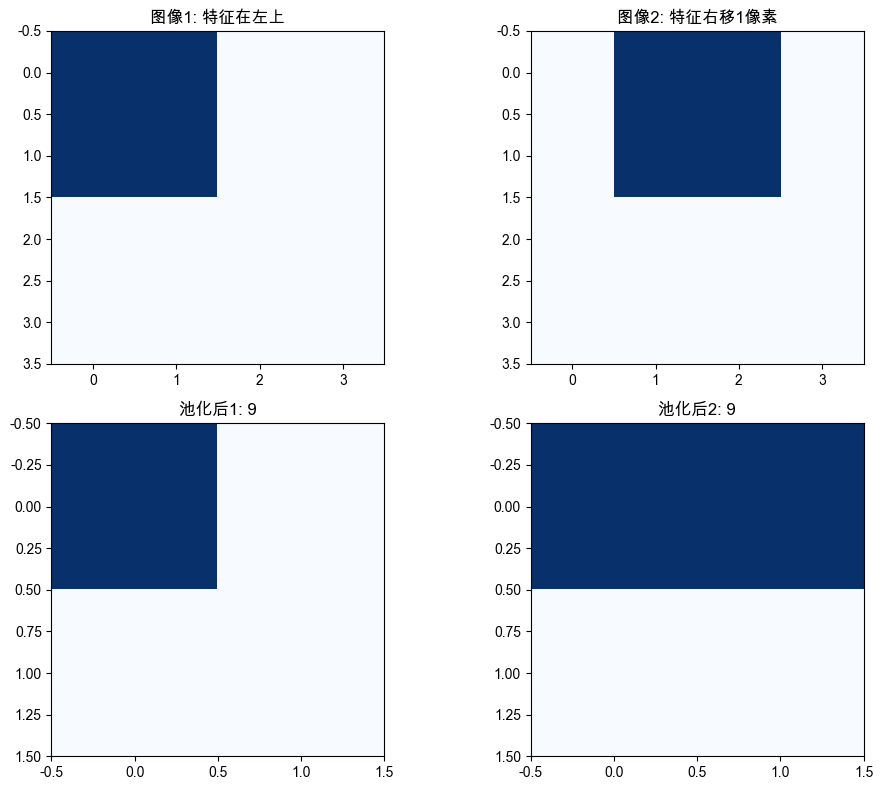

💡 虽然特征位置不同，池化后左上角的值都是 9！
   这就是池化带来的平移不变性


In [7]:
# 创建一个特征，在两个位置略有不同
img1 = np.zeros((4, 4))
img1[0:2, 0:2] = 9  # 左上角

img2 = np.zeros((4, 4))
img2[0:2, 1:3] = 9  # 稍微右移

pool1 = max_pool2d(img1, 2, 2)
pool2 = max_pool2d(img2, 2, 2)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].imshow(img1, cmap='Blues')
axes[0, 0].set_title('图像1: 特征在左上')

axes[0, 1].imshow(img2, cmap='Blues')
axes[0, 1].set_title('图像2: 特征右移1像素')

axes[1, 0].imshow(pool1, cmap='Blues')
axes[1, 0].set_title(f'池化后1: {pool1[0,0]:.0f}')

axes[1, 1].imshow(pool2, cmap='Blues')
axes[1, 1].set_title(f'池化后2: {pool2[0,0]:.0f}')

plt.tight_layout()
plt.show()

print("💡 虽然特征位置不同，池化后左上角的值都是 9！")
print("   这就是池化带来的平移不变性")

---

## 📝 本章小结

| 池化类型 | 公式 | 特点 |
|----------|------|------|
| 最大池化 | $\max(window)$ | 保留最强特征 |
| 平均池化 | $\text{mean}(window)$ | 保留整体信息 |
| 全局平均池化 | $\text{mean}(H, W)$ | 替代全连接 |

**重要**：池化层没有可学习参数！

---

## 🚀 下一步

继续学习 **05_cnn_architecture.ipynb** - 完整 CNN 架构